### Basic Classification (Clothing MNIST)

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.4.0


#### Data Import

In [3]:
#import dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset has returned 4 numpy arrays.

In [5]:
#preview labels (range from 0-9 where each label refers to a clothing item)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
#since the class names are not included with the dataset, store them here
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### EDA

In [7]:
#how many images in training set?
len(train_labels)

60000

In [8]:
train_images.shape #each image is represented as 28x28 pixels

(60000, 28, 28)

In [9]:
len(test_labels) #10K images in the test set

10000

#### Preprocessing

We'll want to preprocess the data before training the neural net. Let's examine an image in the dataset to get a sense of what we're dealing with...

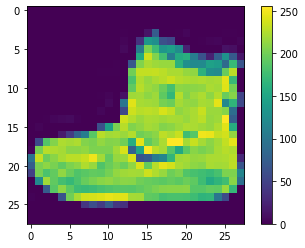

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Note that the pixel values always fall within the range of 0-255 (can change the image above to test). We'll scale these to a range of 0-1 before modeling.

In [11]:
#scaling pixel feature
train_images = train_images / 255
test_images = test_images / 255 #remember to also preprocess test set

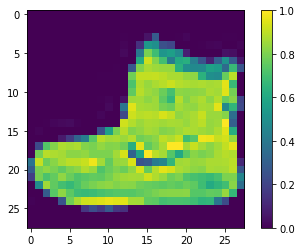

In [26]:
#now we see pixel values range from 0-1
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that data is in correct format, let's preview the first 25 images from the training set and display the class name below each image

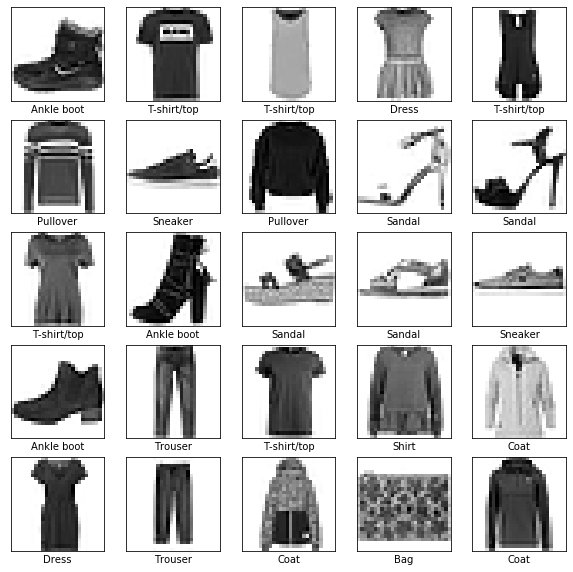

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Build the Model

Building the neural net requires configuring the layers of the model, then compiling the model. Layers extract representations from the dasta fed into them.

Most of deep learning consists of chaining together simple layers. Most layers (e.g., `tf.keras.layers.Dense`) have parameters that are learned during training.

In [14]:
#build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #transforms image format (28x28) to a 1D array
    tf.keras.layers.Dense(128, activation = 'relu'), #1st Dense layer that has 128 nodes/neurons
    tf.keras.layers.Dense(10) #2nd Dense layer returns the desired output (10 different clothing classes)
])

In [16]:
#compile the model
model.compile(optimizer = 'adam', #multiple optimizers to choose from
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #measures how accurate the model is during training...minimizing this function helps "steer" the model in the right direction
             metrics = ['accuracy']) #here we're using accuracy (i.e., are images correctly classified or not)

In [17]:
#fit the model
model.fit(train_images,
         train_labels,
         epochs = 10) #an epoch is one full iteration over the entire x and y data provided

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - ETA: 32:25 - loss: 2.4596 - accuracy: 0.031 - ETA: 5s - loss: 1.9831 - accuracy: 0.2775  - ETA: 4s - loss: 1.6669 - accuracy: 0.40 - ETA: 4s - loss: 1.4802 - accuracy: 0.47 - ETA: 4s - loss: 1.3801 - accuracy: 0.51 - ETA: 4s - loss: 1.3067 - accuracy: 0.54 - ETA: 4s - loss: 1.2485 - accuracy: 0.56 - ETA: 4s - loss: 1.200

1875/1875 [==============================] - ETA: 11s - loss: 0.1630 - accuracy: 0.937 - ETA: 4s - loss: 0.3675 - accuracy: 0.859 - ETA: 4s - loss: 0.3651 - accuracy: 0.86 - ETA: 3s - loss: 0.3706 - accuracy: 0.85 - ETA: 3s - loss: 0.3755 - accuracy: 0.85 - ETA: 3s - loss: 0.3780 - accuracy: 0.85 - ETA: 3s - loss: 0.3807 - accuracy: 0.85 - ETA: 4s - loss: 0.3824 - accuracy: 0.85 - ETA: 4s - loss: 0.3839 - accuracy: 0.85 - ETA: 4s - loss: 0.3853 - accuracy: 0.85 - ETA: 4s - loss: 0.3862 - accuracy: 0.85 - ETA: 4s - loss: 0.3869 - accuracy: 0.85 - ETA: 4s - loss: 0.3873 - accuracy: 0.85 - ETA: 4s - loss: 0.3874 - accuracy: 0.85 - ETA: 4s - loss: 0.3873 - accuracy: 0.85 - ETA: 4s - loss: 0.3873 - accuracy: 0.85 - ETA: 4s - loss: 0.3876 - accuracy: 0.85 - ETA: 4s - loss: 0.3879 - accuracy: 0.85 - ETA: 4s - loss: 0.3883 - accuracy: 0.85 - ETA: 4s - loss: 0.3886 - accuracy: 0.85 - ETA: 4s - loss: 0.3888 - accuracy: 0.85 - ETA: 4s - loss: 0.3889 - accuracy: 0.85 - ETA: 4s - loss: 0.3889 - acc

1875/1875 [==============================] - ETA: 9s - loss: 0.4401 - accuracy: 0.84 - ETA: 5s - loss: 0.3483 - accuracy: 0.87 - ETA: 5s - loss: 0.3436 - accuracy: 0.87 - ETA: 5s - loss: 0.3416 - accuracy: 0.87 - ETA: 5s - loss: 0.3382 - accuracy: 0.87 - ETA: 5s - loss: 0.3375 - accuracy: 0.87 - ETA: 5s - loss: 0.3390 - accuracy: 0.87 - ETA: 5s - loss: 0.3397 - accuracy: 0.87 - ETA: 5s - loss: 0.3411 - accuracy: 0.87 - ETA: 5s - loss: 0.3421 - accuracy: 0.87 - ETA: 5s - loss: 0.3429 - accuracy: 0.87 - ETA: 5s - loss: 0.3441 - accuracy: 0.87 - ETA: 4s - loss: 0.3452 - accuracy: 0.87 - ETA: 4s - loss: 0.3460 - accuracy: 0.87 - ETA: 4s - loss: 0.3469 - accuracy: 0.87 - ETA: 4s - loss: 0.3478 - accuracy: 0.87 - ETA: 4s - loss: 0.3484 - accuracy: 0.87 - ETA: 4s - loss: 0.3488 - accuracy: 0.87 - ETA: 4s - loss: 0.3491 - accuracy: 0.87 - ETA: 4s - loss: 0.3493 - accuracy: 0.87 - ETA: 4s - loss: 0.3494 - accuracy: 0.87 - ETA: 4s - loss: 0.3494 - accuracy: 0.87 - ETA: 4s - loss: 0.3494 - accura

1875/1875 [==============================] - ETA: 13s - loss: 0.2655 - accuracy: 0.906 - ETA: 6s - loss: 0.2704 - accuracy: 0.892 - ETA: 5s - loss: 0.2779 - accuracy: 0.89 - ETA: 5s - loss: 0.2785 - accuracy: 0.89 - ETA: 5s - loss: 0.2834 - accuracy: 0.89 - ETA: 5s - loss: 0.2883 - accuracy: 0.89 - ETA: 5s - loss: 0.2912 - accuracy: 0.89 - ETA: 5s - loss: 0.2931 - accuracy: 0.89 - ETA: 5s - loss: 0.2950 - accuracy: 0.89 - ETA: 5s - loss: 0.2970 - accuracy: 0.89 - ETA: 5s - loss: 0.2982 - accuracy: 0.89 - ETA: 5s - loss: 0.2989 - accuracy: 0.89 - ETA: 5s - loss: 0.2996 - accuracy: 0.89 - ETA: 5s - loss: 0.3002 - accuracy: 0.89 - ETA: 5s - loss: 0.3009 - accuracy: 0.89 - ETA: 4s - loss: 0.3014 - accuracy: 0.89 - ETA: 4s - loss: 0.3018 - accuracy: 0.89 - ETA: 4s - loss: 0.3021 - accuracy: 0.89 - ETA: 4s - loss: 0.3026 - accuracy: 0.89 - ETA: 4s - loss: 0.3030 - accuracy: 0.89 - ETA: 4s - loss: 0.3034 - accuracy: 0.89 - ETA: 4s - loss: 0.3037 - accuracy: 0.89 - ETA: 4s - loss: 0.3040 - acc

1875/1875 [==============================] - ETA: 9s - loss: 0.4406 - accuracy: 0.75 - ETA: 5s - loss: 0.2783 - accuracy: 0.88 - ETA: 5s - loss: 0.2766 - accuracy: 0.88 - ETA: 5s - loss: 0.2793 - accuracy: 0.88 - ETA: 5s - loss: 0.2833 - accuracy: 0.88 - ETA: 4s - loss: 0.2855 - accuracy: 0.88 - ETA: 4s - loss: 0.2857 - accuracy: 0.88 - ETA: 4s - loss: 0.2858 - accuracy: 0.89 - ETA: 4s - loss: 0.2860 - accuracy: 0.89 - ETA: 4s - loss: 0.2865 - accuracy: 0.89 - ETA: 4s - loss: 0.2872 - accuracy: 0.89 - ETA: 4s - loss: 0.2876 - accuracy: 0.89 - ETA: 4s - loss: 0.2881 - accuracy: 0.89 - ETA: 4s - loss: 0.2888 - accuracy: 0.89 - ETA: 4s - loss: 0.2893 - accuracy: 0.89 - ETA: 4s - loss: 0.2898 - accuracy: 0.89 - ETA: 4s - loss: 0.2902 - accuracy: 0.89 - ETA: 4s - loss: 0.2906 - accuracy: 0.89 - ETA: 4s - loss: 0.2910 - accuracy: 0.89 - ETA: 4s - loss: 0.2914 - accuracy: 0.89 - ETA: 4s - loss: 0.2917 - accuracy: 0.89 - ETA: 4s - loss: 0.2921 - accuracy: 0.89 - ETA: 4s - loss: 0.2923 - accura

1875/1875 [==============================] - ETA: 25s - loss: 0.3290 - accuracy: 0.781 - ETA: 5s - loss: 0.3129 - accuracy: 0.867 - ETA: 5s - loss: 0.2972 - accuracy: 0.88 - ETA: 5s - loss: 0.2894 - accuracy: 0.89 - ETA: 4s - loss: 0.2879 - accuracy: 0.89 - ETA: 4s - loss: 0.2881 - accuracy: 0.89 - ETA: 4s - loss: 0.2886 - accuracy: 0.89 - ETA: 4s - loss: 0.2883 - accuracy: 0.89 - ETA: 4s - loss: 0.2885 - accuracy: 0.89 - ETA: 4s - loss: 0.2884 - accuracy: 0.89 - ETA: 4s - loss: 0.2882 - accuracy: 0.89 - ETA: 4s - loss: 0.2878 - accuracy: 0.89 - ETA: 4s - loss: 0.2869 - accuracy: 0.89 - ETA: 4s - loss: 0.2863 - accuracy: 0.89 - ETA: 4s - loss: 0.2861 - accuracy: 0.89 - ETA: 4s - loss: 0.2857 - accuracy: 0.89 - ETA: 4s - loss: 0.2853 - accuracy: 0.89 - ETA: 4s - loss: 0.2847 - accuracy: 0.89 - ETA: 4s - loss: 0.2843 - accuracy: 0.89 - ETA: 4s - loss: 0.2842 - accuracy: 0.89 - ETA: 4s - loss: 0.2841 - accuracy: 0.89 - ETA: 3s - loss: 0.2839 - accuracy: 0.89 - ETA: 3s - loss: 0.2838 - acc

1875/1875 [==============================] - ETA: 11s - loss: 0.2431 - accuracy: 0.937 - ETA: 5s - loss: 0.2938 - accuracy: 0.889 - ETA: 5s - loss: 0.2802 - accuracy: 0.89 - ETA: 6s - loss: 0.2741 - accuracy: 0.89 - ETA: 5s - loss: 0.2673 - accuracy: 0.90 - ETA: 5s - loss: 0.2634 - accuracy: 0.90 - ETA: 5s - loss: 0.2618 - accuracy: 0.90 - ETA: 5s - loss: 0.2611 - accuracy: 0.90 - ETA: 5s - loss: 0.2596 - accuracy: 0.90 - ETA: 5s - loss: 0.2584 - accuracy: 0.90 - ETA: 5s - loss: 0.2575 - accuracy: 0.90 - ETA: 5s - loss: 0.2569 - accuracy: 0.90 - ETA: 5s - loss: 0.2566 - accuracy: 0.90 - ETA: 5s - loss: 0.2563 - accuracy: 0.90 - ETA: 5s - loss: 0.2562 - accuracy: 0.90 - ETA: 4s - loss: 0.2560 - accuracy: 0.90 - ETA: 4s - loss: 0.2559 - accuracy: 0.90 - ETA: 4s - loss: 0.2560 - accuracy: 0.90 - ETA: 4s - loss: 0.2561 - accuracy: 0.90 - ETA: 4s - loss: 0.2562 - accuracy: 0.90 - ETA: 4s - loss: 0.2562 - accuracy: 0.90 - ETA: 4s - loss: 0.2561 - accuracy: 0.90 - ETA: 4s - loss: 0.2561 - acc

1875/1875 [==============================] - ETA: 11s - loss: 0.1917 - accuracy: 0.968 - ETA: 6s - loss: 0.2046 - accuracy: 0.932 - ETA: 5s - loss: 0.2277 - accuracy: 0.91 - ETA: 5s - loss: 0.2384 - accuracy: 0.91 - ETA: 5s - loss: 0.2418 - accuracy: 0.91 - ETA: 5s - loss: 0.2424 - accuracy: 0.91 - ETA: 5s - loss: 0.2432 - accuracy: 0.91 - ETA: 5s - loss: 0.2430 - accuracy: 0.90 - ETA: 5s - loss: 0.2431 - accuracy: 0.90 - ETA: 5s - loss: 0.2431 - accuracy: 0.90 - ETA: 5s - loss: 0.2434 - accuracy: 0.90 - ETA: 4s - loss: 0.2436 - accuracy: 0.90 - ETA: 4s - loss: 0.2440 - accuracy: 0.90 - ETA: 4s - loss: 0.2447 - accuracy: 0.90 - ETA: 4s - loss: 0.2453 - accuracy: 0.90 - ETA: 4s - loss: 0.2457 - accuracy: 0.90 - ETA: 4s - loss: 0.2461 - accuracy: 0.90 - ETA: 4s - loss: 0.2464 - accuracy: 0.90 - ETA: 4s - loss: 0.2466 - accuracy: 0.90 - ETA: 4s - loss: 0.2467 - accuracy: 0.90 - ETA: 4s - loss: 0.2468 - accuracy: 0.90 - ETA: 4s - loss: 0.2469 - accuracy: 0.90 - ETA: 4s - loss: 0.2470 - acc

1875/1875 [==============================] - ETA: 13s - loss: 0.3251 - accuracy: 0.875 - ETA: 5s - loss: 0.3120 - accuracy: 0.864 - ETA: 5s - loss: 0.2854 - accuracy: 0.88 - ETA: 5s - loss: 0.2698 - accuracy: 0.89 - ETA: 5s - loss: 0.2631 - accuracy: 0.89 - ETA: 5s - loss: 0.2579 - accuracy: 0.89 - ETA: 5s - loss: 0.2544 - accuracy: 0.89 - ETA: 5s - loss: 0.2524 - accuracy: 0.90 - ETA: 5s - loss: 0.2515 - accuracy: 0.90 - ETA: 5s - loss: 0.2504 - accuracy: 0.90 - ETA: 5s - loss: 0.2490 - accuracy: 0.90 - ETA: 5s - loss: 0.2482 - accuracy: 0.90 - ETA: 5s - loss: 0.2475 - accuracy: 0.90 - ETA: 5s - loss: 0.2471 - accuracy: 0.90 - ETA: 5s - loss: 0.2467 - accuracy: 0.90 - ETA: 4s - loss: 0.2465 - accuracy: 0.90 - ETA: 4s - loss: 0.2465 - accuracy: 0.90 - ETA: 4s - loss: 0.2464 - accuracy: 0.90 - ETA: 4s - loss: 0.2464 - accuracy: 0.90 - ETA: 4s - loss: 0.2463 - accuracy: 0.90 - ETA: 4s - loss: 0.2462 - accuracy: 0.90 - ETA: 4s - loss: 0.2461 - accuracy: 0.90 - ETA: 4s - loss: 0.2461 - acc

1875/1875 [==============================] - ETA: 9s - loss: 0.2252 - accuracy: 0.96 - ETA: 4s - loss: 0.2215 - accuracy: 0.91 - ETA: 4s - loss: 0.2237 - accuracy: 0.91 - ETA: 5s - loss: 0.2297 - accuracy: 0.91 - ETA: 5s - loss: 0.2317 - accuracy: 0.91 - ETA: 5s - loss: 0.2317 - accuracy: 0.91 - ETA: 5s - loss: 0.2310 - accuracy: 0.91 - ETA: 5s - loss: 0.2305 - accuracy: 0.91 - ETA: 5s - loss: 0.2300 - accuracy: 0.91 - ETA: 5s - loss: 0.2296 - accuracy: 0.91 - ETA: 4s - loss: 0.2293 - accuracy: 0.91 - ETA: 4s - loss: 0.2296 - accuracy: 0.91 - ETA: 4s - loss: 0.2298 - accuracy: 0.91 - ETA: 4s - loss: 0.2299 - accuracy: 0.91 - ETA: 4s - loss: 0.2301 - accuracy: 0.91 - ETA: 4s - loss: 0.2304 - accuracy: 0.91 - ETA: 4s - loss: 0.2307 - accuracy: 0.91 - ETA: 4s - loss: 0.2310 - accuracy: 0.91 - ETA: 4s - loss: 0.2313 - accuracy: 0.91 - ETA: 4s - loss: 0.2315 - accuracy: 0.91 - ETA: 4s - loss: 0.2317 - accuracy: 0.91 - ETA: 4s - loss: 0.2319 - accuracy: 0.91 - ETA: 4s - loss: 0.2320 - accura

We see accuracy reach about 91% by epoch 10 on the training data.

In [18]:
#evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('nTest accuracy:', test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.3461 - accuracy: 0.8771
nTest accuracy: 0.8770999908447266


We obtain 88% accuracy on the test set.

#### Making Predictions

With the model trained, we can use it to make predictions about some images.

In [19]:
#attach a softmax layer to convert the logits to probabilities (easier to interpret) (https://deepai.org/machine-learning-glossary-and-terms/softmax-layer)
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [24]:
#define predictions
predictions = probability_model.predict(test_images)
    #these are the predicted labels for each image in the testing set

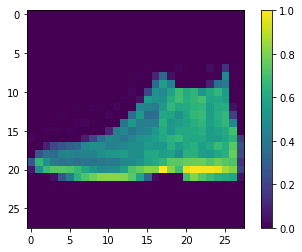

In [27]:
#examine first image in test set
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
#what did the model predict?
predictions[0]
    #it looks like the 10th number has the largest probability...aka clothing
    #class #9

array([6.73200304e-08, 3.84141543e-07, 3.37239237e-09, 5.36375877e-09,
       5.16108878e-10, 1.50162319e-04, 9.21954157e-09, 1.46941803e-02,
       1.05835774e-07, 9.85155046e-01], dtype=float32)

Note that the prediction is an array of 10 numbers (output from the last dense layer of the neural net). They represent the model's "confidence" (with a probability) that the image corresponds to each of the 10 different clothing classes we had.

In [29]:
#what was clothing class #9?
class_names[9]
    #looks correct to me!

'Ankle boot'

In [30]:
#confirm by checking the test labels
test_labels[0]

9

In [31]:
#neat plot functions to visualize the class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

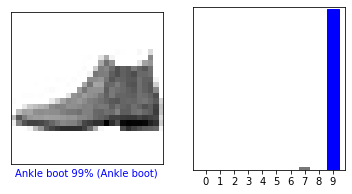

In [33]:
i = 0 #first image of test set
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

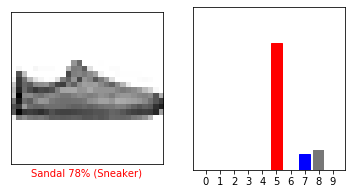

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#example of an incorrect prediction

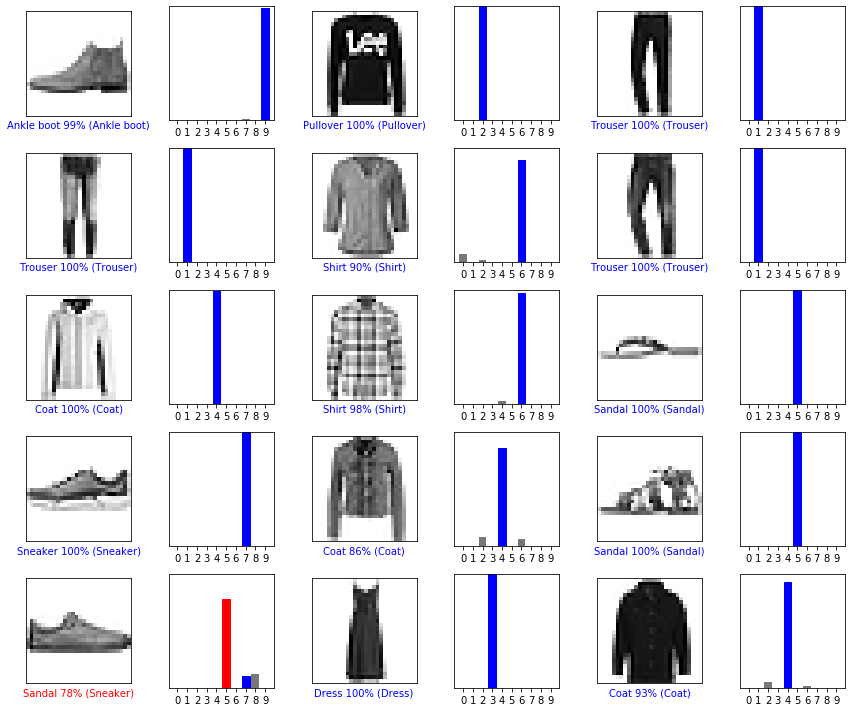

In [37]:
#for several images now

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()